In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\Intership Data\iNeubytes\BTC-2021min.csv')
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [3]:
df.shape

(610782, 9)

In [4]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,6.107820e+05,610782.000000,610782.000000,610782.000000,610782.000000,610782.000000,6.107820e+05
mean,1.627783e+09,46482.265381,46509.783597,46454.085712,46482.567211,3.165254,1.389474e+05
std,1.057906e+07,9453.990285,9454.798088,9453.135638,9454.107853,7.893321,3.298068e+05
min,1.609459e+09,28093.810000,28397.520000,27734.000000,28073.030000,0.000000,0.000000e+00
25%,1.618621e+09,38129.052500,38157.882500,38099.437500,38129.137500,0.193192,8.859586e+03
50%,1.627783e+09,46666.960000,46697.745000,46636.710000,46667.295000,0.924971,4.190121e+04
75%,1.636944e+09,54907.797500,54938.655000,54877.405000,54907.412500,2.989888,1.349341e+05
max,1.646106e+09,69000.000000,69000.000000,68799.990000,69000.000000,398.565948,1.396792e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   symbol      610782 non-null  object 
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.9+ MB


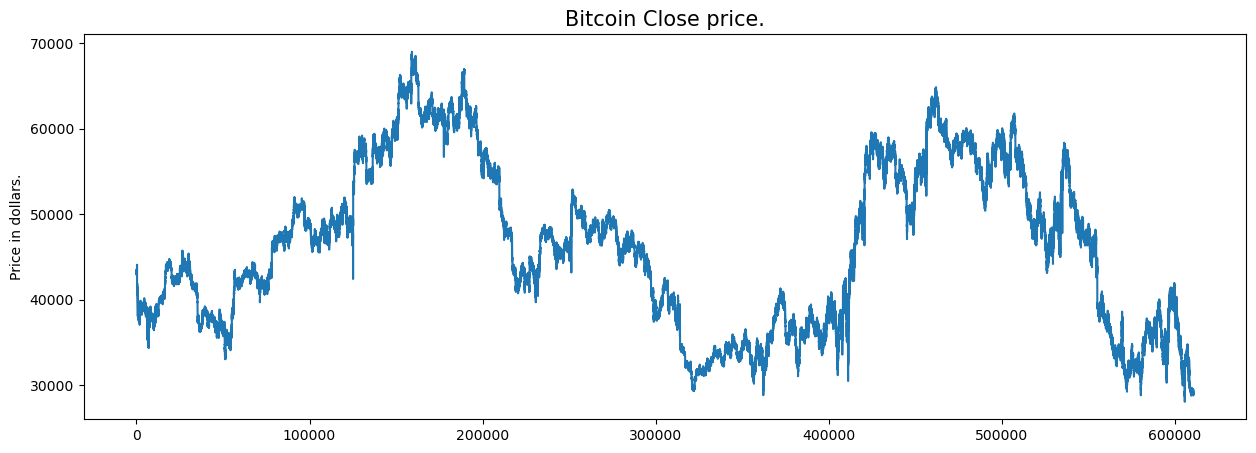

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df['close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [7]:
df.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

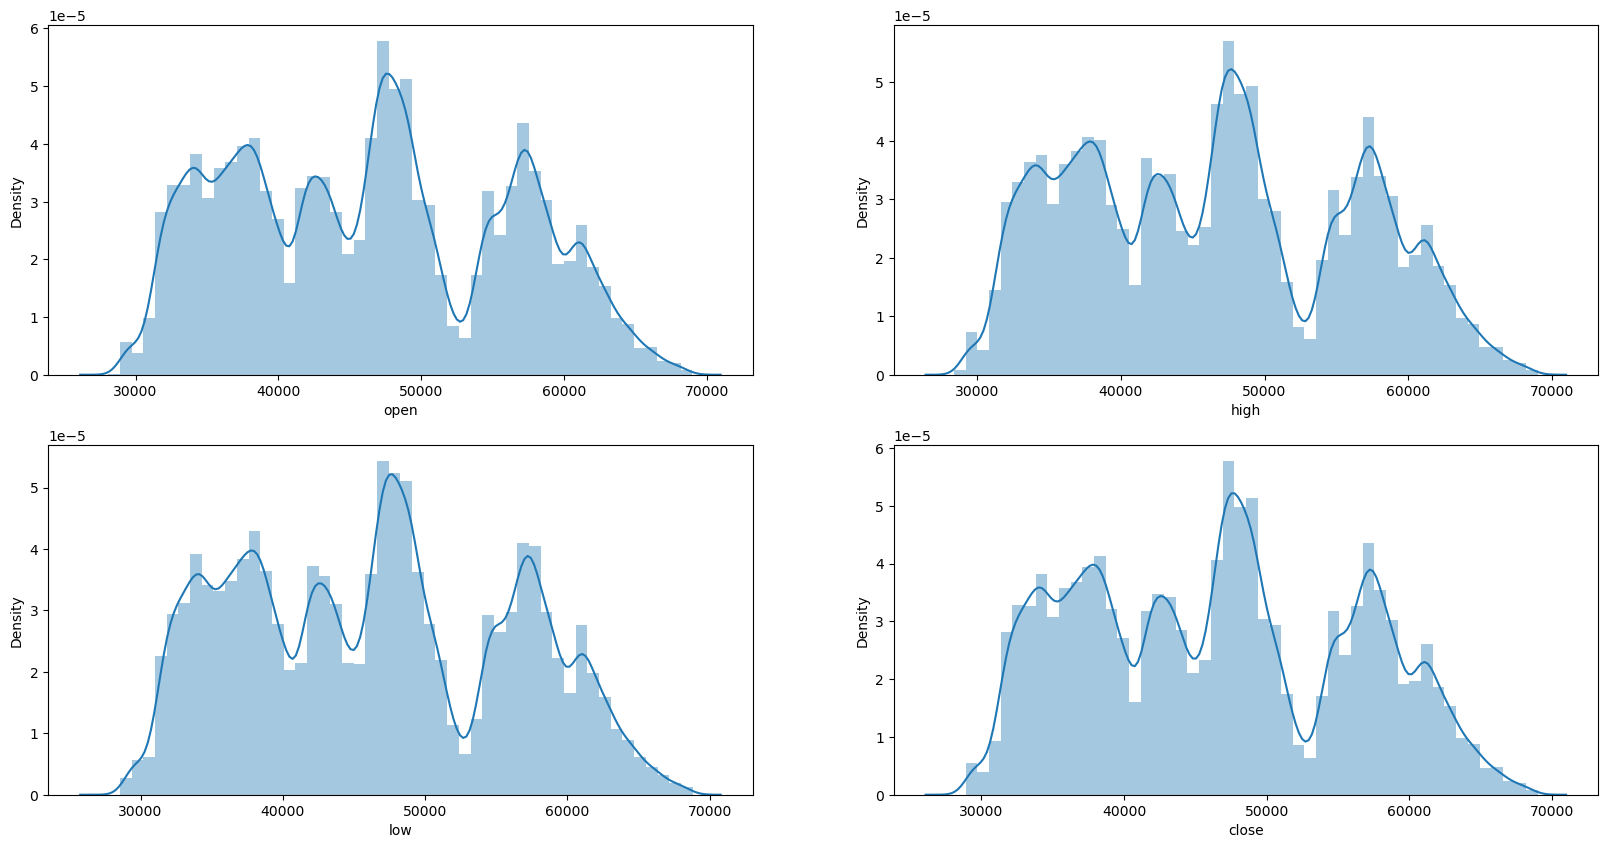

In [8]:
features = ['open', 'high', 'low', 'close']
 
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.distplot(df[col])
plt.show()

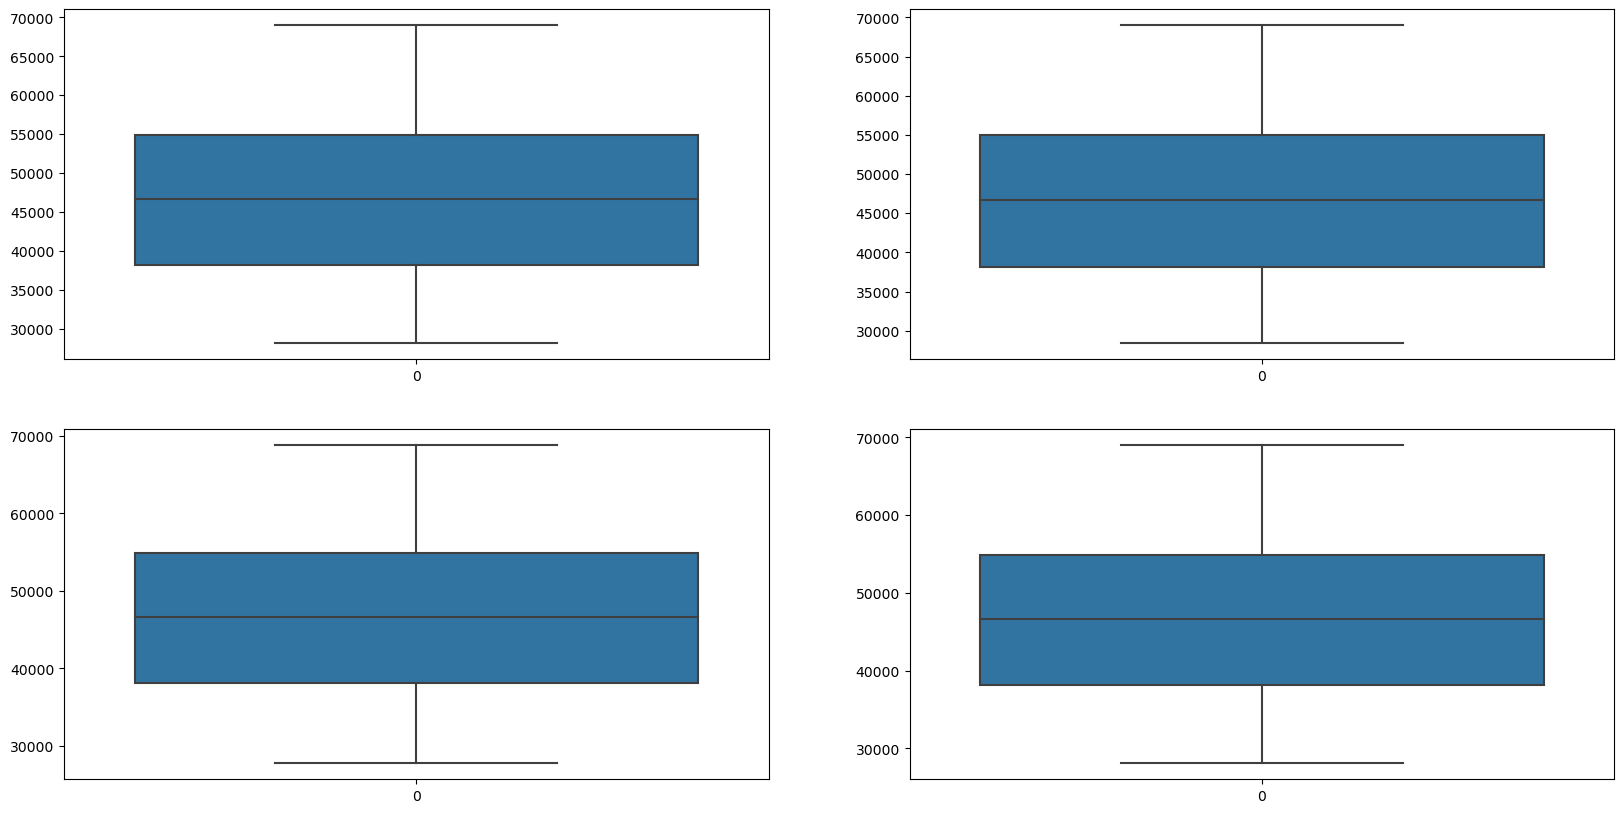

In [9]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[col])
plt.show()

In [11]:
df['Year']=df['date'].dt.year
df['Month']=df['date'].dt.month
df['Day']=df['date'].dt.day


In [12]:
df.dtypes

unix                   int64
date          datetime64[ns]
symbol                object
open                 float64
high                 float64
low                  float64
close                float64
Volume BTC           float64
Volume USD           float64
Year                   int64
Month                  int64
Day                    int64
dtype: object

In [10]:

df['date']=pd.to_datetime(df['date'])

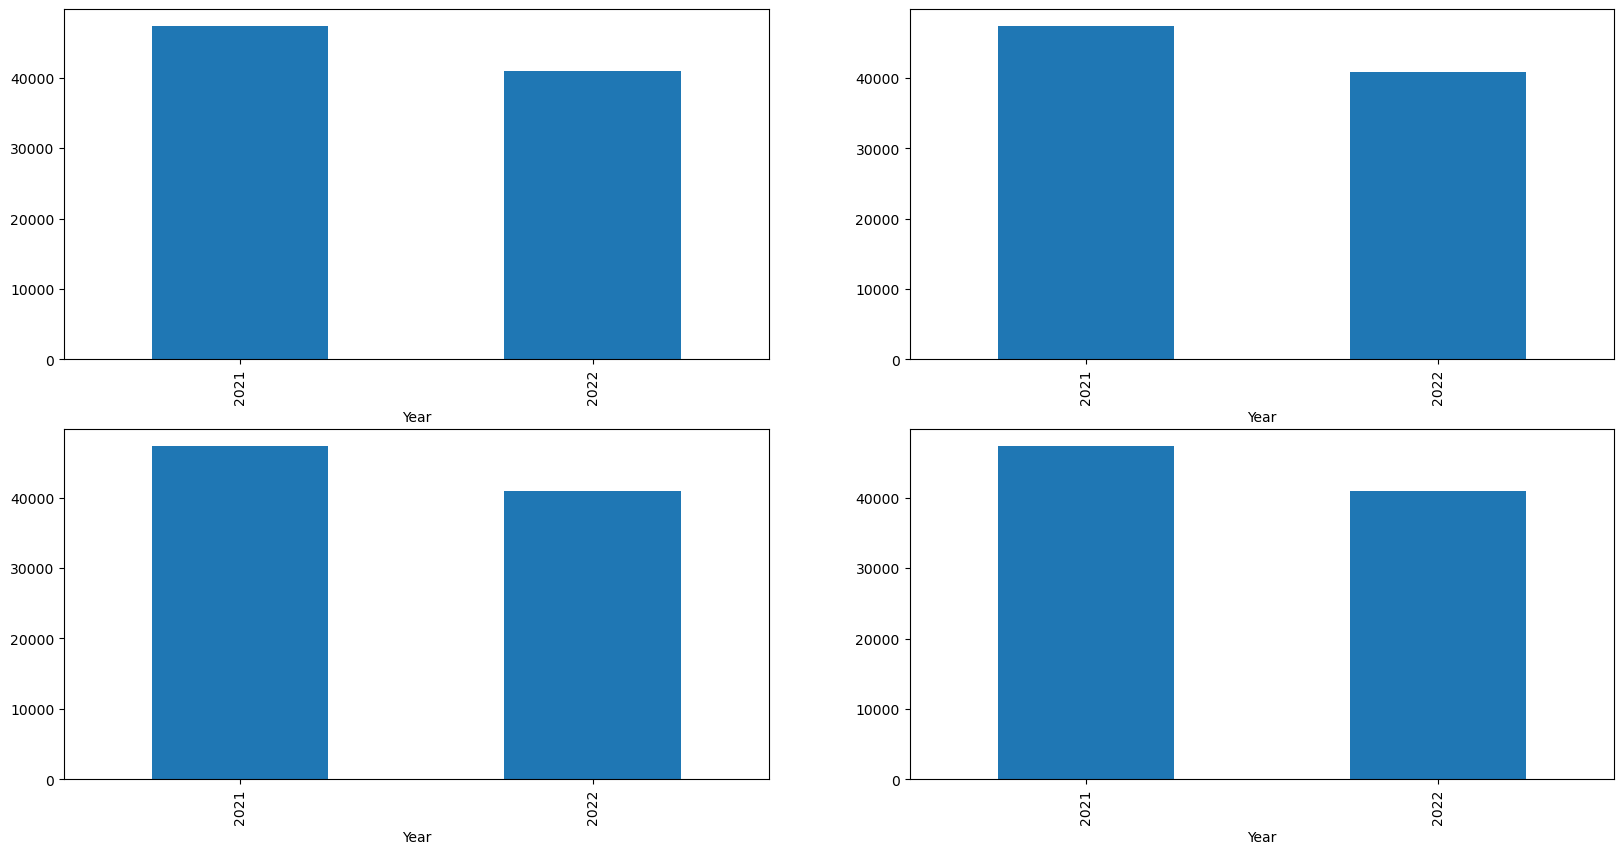

In [13]:
data_grouped = df.groupby('Year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['open', 'high', 'low', 'close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [14]:
df['open-close']  = df['open'] - df['close']
df['low-high']  = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

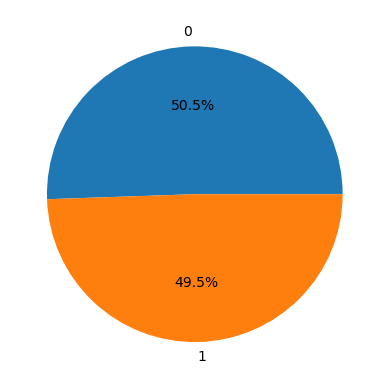

In [15]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

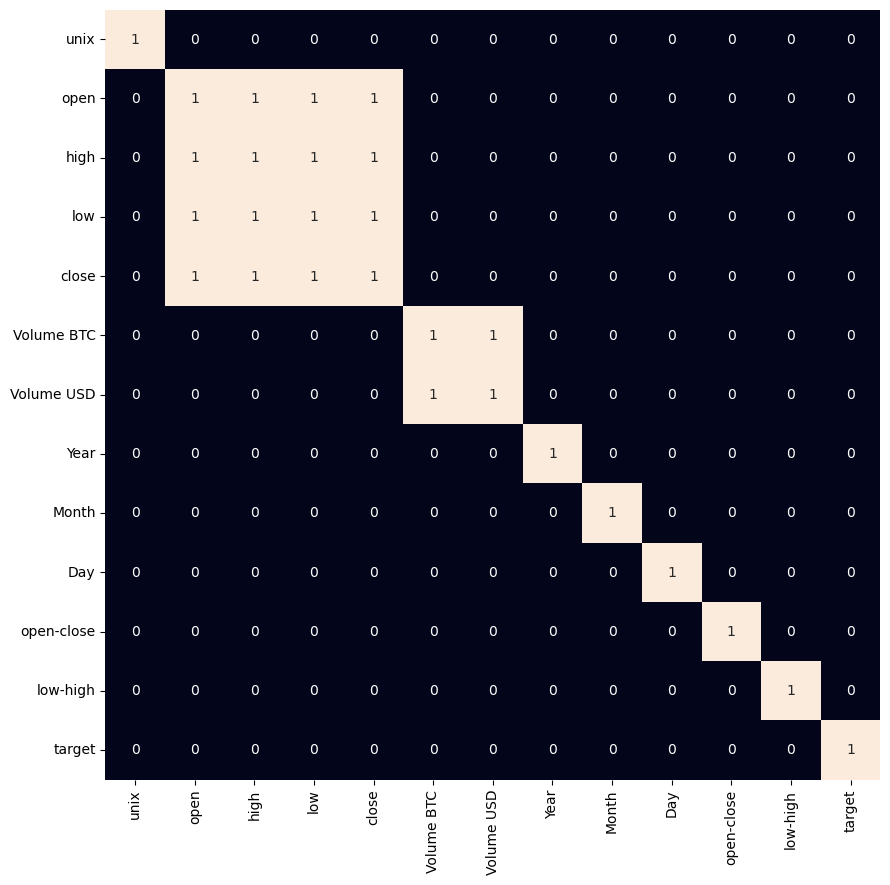

In [16]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [17]:
features = df[['open-close', 'low-high']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(549703, 2) (61079, 2)


In [26]:
models = LogisticRegression()
 

models.fit(X_train, Y_train)
 
print(f'{models} : ')
print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models.predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models.predict_proba(X_valid)[:,1]))
print()

LogisticRegression() : 
Training Accuracy :  0.9235077038521149
Validation Accuracy :  0.9247498279761288

